# Agent position and orientation -> sensor readings:

1. IR sensor  

    input:
    - agent location and orientation
    - environment (height & width)
    - location and r of other agents
    
    for each IR sensor:
    1. get IR loc and IR orientation from agent loc and agent orientation
    2. check for wall 
    3. check for other agents
    4. compare readings, take the greater among all
 

In [33]:
from Environment import environment
from Agent import agent
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle, FancyArrow, Circle
from Helper import find_dx, find_dy, find_loc, find_ang, get_distance, norm_ang
import math


            position: (241.67645519609982, 207.37326717386688),
            angle: 34.54878513377271
            


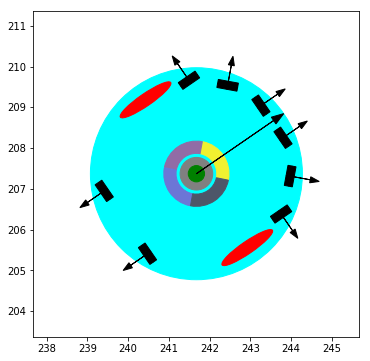

In [39]:
robot = agent(ang=rd.uniform(0,360))
robot.show(verbose=True)

In [31]:
import random as rd
env = environment()
env.agents = [agent((rd.uniform(5, 270), rd.uniform(5, 270)), rd.uniform(0, 359)),
              agent((rd.uniform(5, 270), rd.uniform(5, 270)), rd.uniform(0, 359)),
              agent((rd.uniform(5, 270), rd.uniform(5, 270)), rd.uniform(0, 359)),
              agent((rd.uniform(5, 270), rd.uniform(5, 270)), rd.uniform(0, 359))
             ]
colors = ['red', 'orange', 'blue', 'green']
for i in range(len(env.agents)):
    env.agents[i].color = colors[i]

(72.96917258890332, 121.05585800619978)
331.5993081986436
red

(241.27126582789447, 240.77675302290575)
275.86534294411007
orange

(32.15849862251287, 236.5371270966195)
57.277047689108535
blue

(35.565302492735654, 12.541975376894337)
319.49014860773985
green



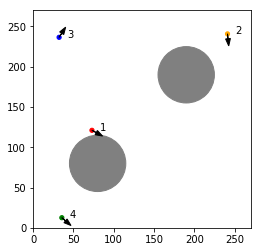

In [32]:
env.show()

for i in env.agents:
    print(i.loc)
    print(i.ang)
    print(i.color)
    print()

loc: (2.06450572092567, 1.89884544742202) ang: 270

overlap: True
diff: 16.660012267483012
side: 7.201128548994967
2.06450572092567 2.6
detectable
[5.318397369102085, 8.479293525741959]
final: 5.318397369102085


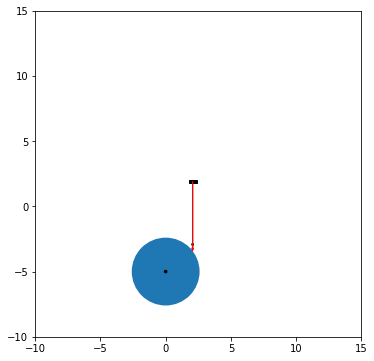

In [23]:
from Agent import agent
import random as rd
from Helper import *
from matplotlib import pyplot as plt
from matplotlib.patches import FancyArrow, Circle, Rectangle

robot=agent((0, -5), 90)

# detect other agents
agent_loc = (3, 3)
agent_r = robot.r

ir_range = 5
loc = 1.35190608027268, 1.86073908706238
ang = 45


width = 0.2
height = 0.6
while get_distance(loc, agent_loc) < agent_r:
    loc = rd.uniform(6, 10), rd.uniform(0, 4)
    ang = rd.uniform(0,360)

agent_loc = (0, -5)
agent_r = robot.r

ir_range = 5
loc = 2.06450572092567, 1.89884544742202
ang = 270

print('loc:', loc, 'ang:', ang)

ax = plt.axes(xlim=(-10, 15), ylim=(-10, 15))
line, = ax.plot([], [])

# plot agent
ax.add_patch(Circle(agent_loc, agent_r))
ax.add_patch(Circle(agent_loc, 0.1, color='black'))


# plot IR sensor
ax.add_patch(Rectangle((loc[0], loc[1]), width/2, height/2,
                       angle=ang, color='black'))
ax.add_patch(Rectangle((loc[0], loc[1]), height/2, width/2,
                       angle=ang+90, color='black'))
ax.add_patch(Rectangle((loc[0], loc[1]), width/2, height/2,
                       angle=ang+180, color='black'))
ax.add_patch(Rectangle((loc[0], loc[1]), height/2, width/2,
                       angle=ang+270, color='black'))
# plot detection range
ax.add_patch(FancyArrow(loc[0], loc[1],
                        find_dx(loc[0], ang, ir_range),
                        find_dy(loc[1], ang, ir_range),
                        color='black',
                        length_includes_head=True,
                        head_width=0.15))

ax.set_aspect('equal')
ax.figure.set_size_inches(6, 6)

overlap = False
detect = False

# detection range overlap with agent?
distance = get_distance(loc, agent_loc)
if distance < ir_range + agent_r:
    overlap = True

print('\noverlap:', overlap)
    
# agent detectable?

# check 1: if tip is within the circle
range_max = find_loc(loc, ang, ir_range)
d = get_distance(range_max, agent_loc)
if d < agent_r:
    print('detectable, tip within\n')
    
# check 2: if vertical line from center of agent to the detection range 
# is shorter than agent_r, the agent is within detection range
other_ang = find_ang(loc, agent_loc)
diff = abs(ang-other_ang)

if diff > 180:
    diff = 360 - diff
    
print('diff:', diff)


if diff < 90:
    side = get_distance(loc, agent_loc)
    print('side:', side)
    closest = side * math.sin(math.radians(diff)) / math.sin(math.radians(90))
    print(closest, agent_r)
    
    if closest < agent_r:
        print('detectable')
        detect = True
    else:
        print('not detectable; not close enough')
else:
    print('not detectable; pointed away')
    
# actual distance of detection
# among all possible answers, it's smaller than range and the smaller one
possible_b = []

if detect:
    side_c = side
    side_a = agent_r
    ang_a = diff

    sin_c = side_c * (math.sin(math.radians(ang_a))/ agent_r)
    ang_c = math.degrees(math.asin(sin_c))

    for possible_c in [ang_c, 180-ang_c]:
        ang_b = 180 - (180-possible_c) - ang_a
        # print(ang_b, '\n')
        side_b = math.sin(math.radians(ang_b)) * (side_a / math.sin(math.radians(ang_a)))
        # print(side_b, '\n')
        possible_b.append(side_b)

    print(possible_b)
    print('final:', min(possible_b))
    
    ax.add_patch(FancyArrow(loc[0], loc[1],
                            find_dx(loc[0], ang, min(possible_b)),
                            find_dy(loc[1], ang, min(possible_b)),
                            color='red',
                            length_includes_head=True,
                            head_width=0.15))

In [ ]:
get_ir_readings():
    possible_readings = []
    # check wall
    
    # check overlap

ang: 69.96025322398219
signal: 0.557478476642754
57.84673673899917
1
(45, 134)


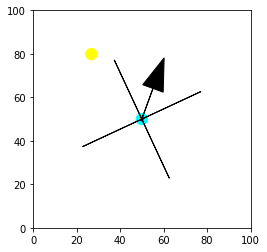

In [16]:
from matplotlib.patches import Wedge

# comm sensors
loc = 50, 50
ang = rd.uniform(0, 360)

print('ang:', ang)
r = robot.r

# other agent
agent_loc = rd.uniform(0, 100), rd.uniform(0, 100)
signal = rd.uniform(0, 1)
print('signal:', signal)

# generate plot
ax = plt.axes(xlim=(0, 100),
              ylim=(0, 100))
line, = ax.plot([], [])

# body
ax.add_patch(Circle(loc, r, color='cyan'))

# the other agent
ax.add_patch(Circle(agent_loc, r, color='yellow'))

# comm sensors
comm_sensors=[(315, 44), (45, 134), (135, 224), (225, 314)]
colors = ['red', 'orange', 'blue', 'green']
# use different, random color to distinguish between the 4 sensors
for i in range(len(comm_sensors)):
    ax.add_patch(Wedge(loc, 0.8,
                       norm_ang(comm_sensors[i][0]+ang),
                       norm_ang(comm_sensors[i][1]+ang), 0.3,
                       color=colors[i]))

# mid line
ax.add_patch(FancyArrow(loc[0], loc[1],
                                find_dx(loc[0], ang, 30),
                                find_dy(loc[1], ang, 30),
                                color='black',
                                length_includes_head=True,
                                head_width=10))

# front line
ax.add_patch(FancyArrow(loc[0], loc[1],
                                find_dx(loc[0], ang+45, 30),
                                find_dy(loc[1], ang+45, 30),
                                color='black',
                                length_includes_head=True,
                                head_width=0.2))

# left line
ax.add_patch(FancyArrow(loc[0], loc[1],
                                find_dx(loc[0], ang+135, 30),
                                find_dy(loc[1], ang+135, 30),
                                color='black',
                                length_includes_head=True,
                                head_width=0.2))
# hind line
ax.add_patch(FancyArrow(loc[0], loc[1],
                                find_dx(loc[0], ang+225, 30),
                                find_dy(loc[1], ang+225, 30),
                                color='black',
                                length_includes_head=True,
                                head_width=0.2))

# right line
ax.add_patch(FancyArrow(loc[0], loc[1],
                                find_dx(loc[0], ang+315, 30),
                                find_dy(loc[1], ang+315, 30),
                                color='black',
                                length_includes_head=True,
                                head_width=0.2))
ax.set_aspect('equal')


# check if an agent is within range
within_range = False
d = get_distance(loc, agent_loc)
if d <= 100:
    within_range = True

# if within range, determine which comm sensor receives the signal
if within_range:
    diff = norm_ang(find_ang(loc, agent_loc) - ang)
    print(diff)
    if diff >= comm_sensors[0][0] or diff < comm_sensors[0][1]:
        received = 0
    elif diff >= comm_sensors[1][0] and diff < comm_sensors[1][1]:
        received = 1
    elif diff >= comm_sensors[2][0] and diff < comm_sensors[2][1]:
        received = 2
    elif diff >= comm_sensors[3][0] and diff < comm_sensors[3][1]:
        received = 3
    print(received)
    print(comm_sensors[received])

In [212]:
from Helper import get_distance, norm_ang, find_loc, find_ang

# detection range overlap with agent?
overlap = False
distance = get_distance(loc, agent_loc)
if distance < ir_range + agent_r:
    overlap = True

print('overlap:', overlap)
    
# agent detectable?

# check 1: if tip is within the circle
range_max = find_loc(loc, ang, ir_range)
d = get_distance(range_max, agent_loc)
if d < agent_r:
    print('detectable, 1')
    
# check 2: if vertical line from center of agent to the detection range 
# is shorter than agent_r, the agent is within detection range
other_ang = find_ang(loc[0], loc[1], agent_loc[0], agent_loc[1])
diff = abs(ang-other_ang)

closest = d * math.sin(math.radians(diff)) / math.sin(math.radians(90))
if closest < agent_r:
    print('detectable, 2')

overlap: True
detectable, 1
detectable, 2


In [7]:
from Agent import agent
from Environment import environment
import random as rd

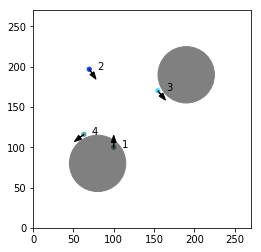

In [24]:
rob = agent((100, 100), 90)
env = environment()

env.agents.append(rob)


for i in range(3):
    a = agent((rd.uniform(0, 200), rd.uniform(0, 200)), rd.uniform(0, 360))
    a.comm_output = rd.uniform(0, 1)
    env.agents.append(a)
    
env.show()

In [25]:
print(rob.get_comm_readings(env.agents[1:]))

for i in range(3):
    print(i+2)
    print(env.agents[i+1].comm_output)
    print(get_distance(rob.loc, env.agents[i+1].loc)<100)
    print()

(0.041560291248290526, 0.6299227786780621, 0, 0)
2
0.9796598453784026
False

3
0.041560291248290526
True

4
0.6299227786780621
True



In [6]:
for i in range(3):
    print(i+2)
    print(env.agents[i+1].comm_output)
    print(get_distance(rob.loc, env.agents[i+1].loc)<100)
    print()
    

2
0.34563448698926813
True

3
0.9876621453210709
True

4
0.5657732471213862
True



In [5]:
from Helper import *
get_distance(rob.loc, env.agents[2].loc)


43.43202738801965

In [ ]:
# 1st quadrant
    if dx >= 0 and dy >= 0:
        if dx != 0:
            rad = math.atan(abs(dy/dx))
            ang_raw = math.degrees(rad)
        else:
            ang_raw = 90
        # print('1st quadrant')
        # print(ang_raw)

    # 2nd quadrant
    elif dx < 0 and dy >= 0:
        if dy != 0:
            rad = math.atan(abs(dx/dy))
            ang_raw = math.degrees(rad) + 90
        else:
            ang_raw = 180
        # print('2nd quadrant')
        # print(ang_raw)

    # 3rd quadrant
    if dx < 0 and dy < 0:
        # print('3rd quadrant')
        rad = math.atan(abs(dy/dx))
        ang_raw = math.degrees(rad) + 180
        # print(rad)
        # print(ang_raw)
    # 4nd quadrant
    if dx >= 0 and dy < 0:
        # print('4th quadrant')
        rad = math.atan(abs(dx/dy))
        ang_raw = math.degrees(rad) + 270
        # print(rad)
        # print(ang_raw)

    ang = ang_raw % 360

    return ang


def find_dx(x, ang, distance):
    """
    Find change in x coordinate.

    Used in find_loc.
    Validated: 03/04/19.
    """
    if ang < 0 or ang >= 360:
        ang = norm_ang(ang)

    # 1st quadrant
    if ang >= 0 and ang < 90:
        dx = distance * math.cos(math.radians(ang))

    # 2nd quadrant
    elif ang >= 90 and ang < 180:
        dx = 0 - distance * math.sin(math.radians(ang - 90))

    # 3rd quadrant
    elif ang >= 180 and ang < 270:
        dx = 0 - distance * math.cos(math.radians(ang - 180))

    # 4th quadrant
    elif ang >= 270 and ang < 360:
        dx = distance * math.sin(math.radians(ang - 270))

    return dx


In [21]:
# get ir reading

# wall check
range_max = find_loc(loc, ang, ir_range)

if range_max[0] < 0 or range_max[0] > width:
    distance = loc[0]/abs(range_max[0]-loc[0])
elif range_max[1] < 0 or range_max[0] > height:
    distance = loc[1]/abs(range_max[1]-loc[1])

else:
    distance = 1

reading = 1-distance

return reading

IndentationError: unexpected indent (<ipython-input-21-2d199c3c2b7e>, line 5)

In [15]:
from matplotlib import patches
patches.

In [108]:
def get_ir_reading(pos, ang, max_range=5, env):
    """
    loc: (x, y) position of the ir sensor
    ang: the angle the ir sensor points to
    max_range: detection range of the ir sensor, default = 5 cm
    env: need to contain the follow parameters:
    - env.width: int, x limit
    - env.height: int, y limit
    - env.agents: list, of agents 
    - 
    """
    

SyntaxError: invalid syntax (<ipython-input-108-d3eeef9f904b>, line 1)

In [229]:
# IR sensors
for i in range(len(self.ir_ang)):

    # width and height of the rectangular IR sensor representation
    width = 0.2
    height = 0.5

    placement_ang = norm_ang(self.ir_placement[i]+self.ang)

    detect_ang = norm_ang(self.ir_ang[i]+self.ang)

    loc = find_loc(self.loc, placement_ang, self.r-0.3)

    ax.add_patch(Rectangle((loc[0], loc[1]), width/2, height/2,
                           angle=detect_ang, color='black'))
    ax.add_patch(Rectangle((loc[0], loc[1]), height/2, width/2,
                           angle=detect_ang+90, color='black'))
    ax.add_patch(Rectangle((loc[0], loc[1]), width/2, height/2,
                           angle=detect_ang+180, color='black'))
    ax.add_patch(Rectangle((loc[0], loc[1]), height/2, width/2,
                           angle=detect_ang+270, color='black'))

    # easier but uglier to use Ellipses; abandoned
    # ax.add_patch(Ellipse(loc, 0.2, 0.7,
    #                      angle=detect_ang, color='black'))
    ax.add_patch(FancyArrow(loc[0], loc[1],
                            find_dx(loc[0], detect_ang, 0.5),
                            find_dy(loc[1], detect_ang, 0.5),
                            color='black',
                            length_includes_head=False,
                            head_width=0.15))

In [226]:
math.sin(math.radians(360-270))

1.0

In [18]:
# put this under AGENT

def get_comm_readings(self, agents):
    """
    Get comm sensor readings.
    
    Inputs:
    - position of the agent
    - position of all other agents
    - range of the 4 comm sensors
    
    Output: 
    - list, reading of the 4 comm sensors
    """ 
    
    comm_sensors = self.comm_sensors
    
    received = [
        [0],
        [0],
        [0],
        [0]
    ]
    for agent in agents:
        # first, check if an agent is within range
        d = get_distance(loc, agent_loc)
        if d <= 100:  # if this is true, then it's within range
            # get the signal
            signal = agent.signal

            # determine which comm sensor receives the signal
            diff = norm_ang(find_ang(self.loc, agent.loc) - self.ang)

            if diff >= comm_sensors[0][0] or diff < comm_sensors[0][1]:
                received[0].append(signal)
            elif diff >= comm_sensors[1][0] and diff < comm_sensors[1][1]:
                received[1].append(signal)
            elif diff >= comm_sensors[2][0] and diff < comm_sensors[2][1]:
                received[2].append(signal)
            elif diff >= comm_sensors[3][0] and diff < comm_sensors[3][1]:
                received[3].append(signal)


xy: (268.83136894993027, 267.2999327286261), ang: 82.32710177368493
range_max: (269.4989560516604, 272.2551650603744)
wall_detected: True 1st quadrant
1st, y
y diff: 2.7000672713738822
ang: 82.32710177368493 distance: 2.7244608230319387
2.7244608230319387


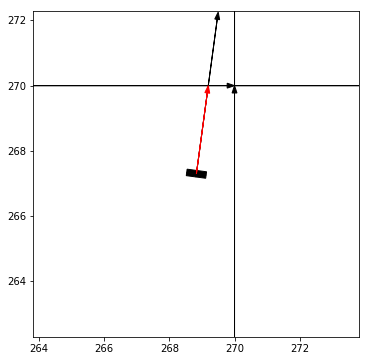

In [9]:
ir_loc = (rd.uniform(267, 270), rd.uniform(267, 270))
ir_ang = rd.uniform(0, 180)
loc = ir_loc
ang = ir_ang
ir_range = 5

width = 0.2
height = 0.6


# wall check
print('xy: {}, ang: {}'.format(ir_loc, ir_ang))
range_max = find_loc(ir_loc, ir_ang, ir_range)
print('range_max:', range_max)

wall_detected = False
mode = 'not_detected'

# 1st quadrant
if ang >= 0 and ang < 90:
    if range_max[0] > env.width or range_max[1] > env.height:
        wall_detected = True
        mode = '1st quadrant'
# 2nd quadrant
elif ang >= 90 and ang < 180:
    if range_max[0] < 0 or range_max[1] > env.height:
        wall_detected = True
        mode = '2nd quadrant'
elif ang >= 180 and ang < 270:
    if range_max[0] < 0 or range_max[1] < 0:
        wall_detected = True
        mode = '3rd quadrant'
elif ang >= 270 and ang < 360:
    if range_max[0] > env.width or range_max[1] < 0:
        wall_detected = True
        mode = '4th quadrant'

print('wall_detected:', wall_detected, mode)

distance = []
if wall_detected:
    # 1st quadrant
    if ang >= 0 and ang < 90:
        if range_max[0] > env.width:
            print('1st, x')
            side_a = env.width - ir_loc[0]
            ang_a = 90 - ir_ang
            d = side_a * math.sin(math.radians(90)) / math.sin(math.radians(ang_a))
            print('x diff:', side_a)
            print('ang:', ang_a, 'distance:', d)
            distance.append(d)
        if range_max[1] > env.height:
            print('1st, y')
            side_a = env.height - ir_loc[1]
            ang_a = ir_ang
            d = side_a * math.sin(math.radians(90)) / math.sin(math.radians(ang_a))
            print('y diff:', side_a)
            print('ang:', ang_a, 'distance:', d)            
            distance.append(d)
        
    if ang >= 90 and ang < 180:
        if range_max[0] < 0:
            print('2nd, x')
            side_a = ir_loc[0]
            ang_a = ang - 90
            d = side_a * math.sin(math.radians(90)) / math.sin(math.radians(ang_a))
            distance.append(d)
        if range_max[1] > env.height:
            print('2nd, y')
            side_a = env.height - ir_loc[1]
            ang_a = 180 - ang
            d = side_a * math.sin(math.radians(90)) / math.sin(math.radians(ang_a))
            distance.append(d)
    
    if ang >= 180 and ang < 270:
        if range_max[0] < 0:
            print('3rd, x')
            side_a = ir_loc[0]
            ang_a = 270 - ang
            d = side_a * math.sin(math.radians(90)) / math.sin(math.radians(ang_a))
            distance.append(d)
        if range_max[1] < 0:
            print('3rd, y')
            side_a = ir_loc[1]
            ang_a = ang - 180
            d = side_a * math.sin(math.radians(90)) / math.sin(math.radians(ang_a))
            distance.append(d)   
    
    if ang >= 270 and ang < 360:
        if range_max[0] > env.width:
            print('4th, x')
            side_a = env.width - ir_loc[0]
            ang_a = ang - 270
            d = side_a * math.sin(math.radians(90)) / math.sin(math.radians(ang_a))
            distance.append(d)
        if range_max[1] < 0:
            print('4th, y')
            side_a = ir_loc[1]
            ang_a = 360 - ang
            d = side_a * math.sin(math.radians(90)) / math.sin(math.radians(ang_a))
            distance.append(d)   
    

if distance:
    print(min(distance))

ax = plt.axes(xlim=(ir_loc[0]-5, ir_loc[0]+5), ylim=(ir_loc[1]-5, ir_loc[1]+5))
line, = ax.plot([], [])

loc = ir_loc
ang = ir_ang

ax.add_patch(Rectangle((loc[0], loc[1]), width/2, height/2,
                       angle=ang, color='black'))
ax.add_patch(Rectangle((loc[0], loc[1]), height/2, width/2,
                       angle=ang+90, color='black'))
ax.add_patch(Rectangle((loc[0], loc[1]), width/2, height/2,
                       angle=ang+180, color='black'))
ax.add_patch(Rectangle((loc[0], loc[1]), height/2, width/2,
                       angle=ang+270, color='black'))

ax.add_patch(FancyArrow(loc[0], loc[1],
                        find_dx(loc[0], ang, 5),
                        find_dy(loc[1], ang, 5),
                        color='black',
                        length_includes_head=True,
                        head_width=0.15))

    
for i in [(0, 0), (0, 270), (270, 270), (270, 0)]:
    x = 270
    y = 270
    if i[0] < 0:
        x = -270
    if i[1] < 0:
        y = -270
    ax.add_patch(FancyArrow(i[0], i[1],
                            x, 0,
                            color='black',
                            length_includes_head=True,
                            head_width=0.15))

    ax.add_patch(FancyArrow(i[0], i[1],
                            0, y,
                            color='black',
                            length_includes_head=True,
                            head_width=0.15))


ax.set_aspect('equal')
ax.figure.set_size_inches(6, 6)


if distance:
    new_loc = find_loc(ir_loc, ir_ang, min(distance))
    ax.add_patch(FancyArrow(ir_loc[0], ir_loc[1],
                            new_loc[0]-ir_loc[0], new_loc[1]-ir_loc[1],
                            color='red',
                            length_includes_head=True,
                            head_width=0.15))